In [1]:
import numpy as np
#from numpy.linalg import cholesky
import matplotlib.pyplot as plt
from functools import reduce

[[2 1]
 [1 2]]
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


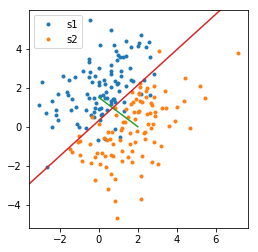

In [9]:
sampleNo = 100
mu = np.array([[0, 2]])
mu1 = np.array([[1.5, 0]])
Sigma = np.array([[2, 1], [1, 2]])
#R = cholesky(Sigma).T  #风险函数
#va,vc = np.linalg.eig(Sigma); R2 = (np.diag(va)**0.5)@vc.T

s1 = np.random.multivariate_normal(mu[0],Sigma,sampleNo) 
s2 = np.random.multivariate_normal(mu1[0],Sigma,sampleNo) 

# s1,s2 各自生成100个 (x,y)
# multivariate_normal(mean, cov, size=None, check_valid=None, tol=None)   均值，协方差，size

x = range(-100,100,1)
print(Sigma)
C = np.linalg.inv(Sigma)  #矩阵求逆，反过来然后放在分母
print(C)

w = 2*np.dot(C, mu1.T-mu.T)
b = reduce(np.dot, [mu,C,mu.T])- reduce(np.dot, [mu1,C,mu1.T])   #(函数,迭代对象)
w0 = (-w[0]/w[1])[0]
y= np.dot(w0, x)+(-b/w[1])

plt.plot(*s1.T,'.',label = 's1')
plt.plot(*s2.T,'.',label = 's2')
plt.axis('scaled')
plt.plot(mu[0],mu1[0],'-')
plt.plot(x,y[0],'-')
plt.legend()